In [1]:
import numpy as np
import pandas as pd

In [3]:
world_cup=pd.read_csv("/content/world_cup.csv")
matches=pd.read_csv("/content/matches_1930_2022.csv")
rank=pd.read_csv("/content/fifa_ranking_2022-10-06.csv")

In [110]:
world_cup.head()


,Year,Host,Teams,Champion,Runner-Up,TopScorrer,Attendance,AttendanceAvg,Matches
0,2022,Qatar,32,Argentina,France,Kylian Mbappé - 8,3404252,53191,64
1,2018,Russia,32,France,Croatia,Harry Kane - 6,3031768,47371,64
2,2014,Brazil,32,Germany,Argentina,James Rodríguez - 6,3429873,53592,64
3,2010,South Africa,32,Spain,Netherlands,"Wesley Sneijder, Thomas Müller... - 5",3178856,49670,64
4,2006,Germany,32,Italy,France,Miroslav Klose - 5,3352605,52384,64


In [105]:
matches.columns

Index(['home_team', 'away_team', 'home_score', 'away_score', 'home_manager',
       'home_captain', 'away_manager', 'away_captain', 'Attendance', 'Venue',
       'Officials', 'Round', 'Date', 'Score', 'Referee', 'Host', 'Year'],
      dtype='object')

In [6]:
rank.head()

,team,team_code,association,rank,previous_rank,points,previous_points
0,Brazil,BRA,CONMEBOL,1,1,1841.30,1837.56
1,Belgium,BEL,UEFA,2,2,1816.71,1821.92
2,Argentina,ARG,CONMEBOL,3,3,1773.88,1770.65
3,France,FRA,UEFA,4,4,1759.78,1764.85
4,England,ENG,UEFA,5,5,1728.47,1737.46


In [8]:
world_cup.shape

(22, 9)

In [11]:
matches.shape


(964, 44)

In [10]:
rank.shape

(211, 7)

It means World_cup has 22 rows and 9 columns . matches has 964 rows and 44 columns . Rank has 211 rows and 7 columns

In [14]:
world_cup.isnull().sum()

,0
Year,0
Host,0
Teams,0
Champion,0
Runner-Up,0
TopScorrer,0
Attendance,0
AttendanceAvg,0
Matches,0


There is no null values in world_cup

In [15]:
matches.isnull().sum()

,0
home_team,0
away_team,0
home_score,0
home_xg,836
home_penalty,929
away_score,0
away_xg,836
away_penalty,929
home_manager,0
home_captain,320


matches has many null values

In [16]:
rank.isnull().sum()

,0
team,0
team_code,0
association,0
rank,0
previous_rank,0
points,0
previous_points,0


Again no null values in rank data

In [18]:
print(world_cup.dtypes)   #here we have checked the columns of 3 datsets we have
print(matches.dtypes)
print(rank.dtypes)

Year              int64
Host             object
Teams             int64
Champion         object
Runner-Up        object
TopScorrer       object
Attendance        int64
AttendanceAvg     int64
Matches           int64
dtype: object
home_team                           object
away_team                           object
home_score                           int64
home_xg                            float64
home_penalty                       float64
away_score                           int64
away_xg                            float64
away_penalty                       float64
home_manager                        object
home_captain                        object
away_manager                        object
away_captain                        object
Attendance                           int64
Venue                               object
Officials                           object
Round                               object
Date                                object
Score                               obj

In [25]:
#change datatypes to imporve performance and accuracy of matches dataset
matches['Date'] = pd.to_datetime(matches['Date'])
matches['home_goal'] = pd.to_numeric(matches['home_goal'], errors='coerce').astype('Int64')
matches['home_penalty'] = matches['home_penalty'].astype('Int64')
matches['away_penalty'] = matches['away_penalty'].astype('Int64')
matches['home_team'] = matches['home_team'].astype('category')

In [27]:
#change datatypes to imporve performance and accuracy of rank dataset
rank['team'] = rank['team'].astype('category')
rank['team_code'] = rank['team_code'].astype('category')
rank['association'] = rank['association'].astype('category')

In [30]:
#calculated percentage of missing values in matches column
missing_percentage = (matches.isnull().sum() / matches.shape[0]) * 100
print(missing_percentage)

home_team                            0.000000
away_team                            0.000000
home_score                           0.000000
home_xg                             86.721992
home_penalty                        96.369295
away_score                           0.000000
away_xg                             86.721992
away_penalty                        96.369295
home_manager                         0.000000
home_captain                        33.195021
away_manager                         0.000000
away_captain                        33.195021
Attendance                           0.000000
Venue                                0.000000
Officials                           26.452282
Round                                0.000000
Date                                 0.000000
Score                                0.000000
Referee                             26.452282
Notes                               92.427386
Host                                 0.000000
Year                              

In [56]:
columns_to_drop = ['home_goal_long', 'away_goal_long', # Changed 'home_goal', 'away_goal' to their _long counterparts
                    'home_penalty', 'away_penalty',  # Kept these as they exist
                    'home_yellow_card_long', 'away_yellow_card_long', # Kept _long counterparts
                    'home_substitute_in_long', 'away_substitute_in_long']
                     # Kept _long coun
existing_columns = matches.columns

columns_to_drop = [col for col in columns_to_drop if col in existing_columns]

# Now drop the existing columns
matches.drop(columns=columns_to_drop, inplace=True)

In [58]:
matches.columns   #updated columns after dropping

Index(['home_team', 'away_team', 'home_score', 'away_score', 'home_manager',
       'home_captain', 'away_manager', 'away_captain', 'Attendance', 'Venue',
       'Officials', 'Round', 'Date', 'Score', 'Referee', 'Host', 'Year'],
      dtype='object')

In [59]:
missing_percentage = (matches.isnull().sum() / matches.shape[0]) * 100
print(missing_percentage)  #updated percentage of missing values

home_team       0.0
away_team       0.0
home_score      0.0
away_score      0.0
home_manager    0.0
home_captain    0.0
away_manager    0.0
away_captain    0.0
Attendance      0.0
Venue           0.0
Officials       0.0
Round           0.0
Date            0.0
Score           0.0
Referee         0.0
Host            0.0
Year            0.0
dtype: float64


now we have zero missing values

1. Which teams have historically performed the best in the World Cup?

In [78]:
# To find the best performance we will sum value counts (no of unique values of
# Champion and Runner up and arrange it in decending order .
Champion=world_cup['Champion'].value_counts()
Runner_up=world_cup['Runner-Up'].value_counts()

top_teams=(Champion+Runner_up).sort_values(ascending=False)
top_teams.head(5)


,count
Brazil,7.0
Argentina,6.0
Italy,6.0
West Germany,5.0
France,4.0


so it can be found out as Brazil , Argentina , Italy , West Germany , France are the top 5 couontries

2. How has the average number of goals per game changed over the years?

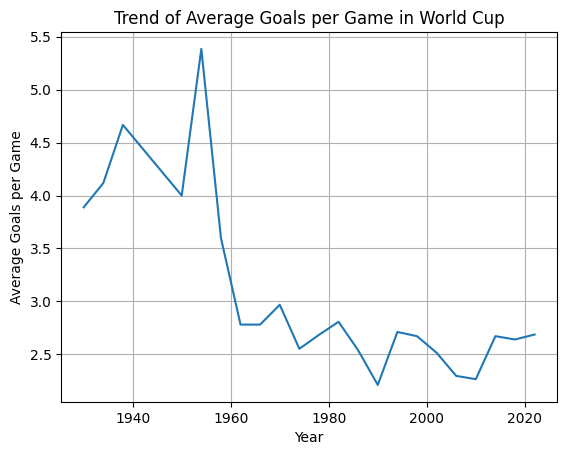

Overall Average Goals per Game: 2.82


In [106]:
import pandas as pd
import matplotlib.pyplot as plt


# 1. Group matches by year and calculate the average goals per game
goals_per_year = matches.groupby('Year')[['home_score', 'away_score']].sum()
goals_per_year['total_goals'] = goals_per_year['home_score'] + goals_per_year['away_score']
goals_per_year['avg_goals_per_game'] = goals_per_year['total_goals'] / matches.groupby('Year')['Year'].count()

# 2. Create a line plot to visualize the trend
plt.plot(goals_per_year.index, goals_per_year['avg_goals_per_game'])
plt.xlabel("Year")
plt.ylabel("Average Goals per Game")
plt.title("Trend of Average Goals per Game in World Cup")
plt.grid(True)
plt.show()

# 3. Calculate and print overall average goals per game
overall_avg_goals = goals_per_year['total_goals'].sum() / matches.shape[0]
print(f"Overall Average Goals per Game: {overall_avg_goals:.2f}")

3. What are the win ratios of notable teams when playing on their home ground?

In [107]:
team_wins = matches.groupby('home_team')['home_score'].sum()
team_losses = matches.groupby('home_team')['away_score'].sum()

team_win_ratios = team_wins / (team_wins+team_losses)
print(team_win_ratios.sort_values(ascending=False).head(5))

home_team
Norway           1.00
Türkiye          1.00
FR Yugoslavia    1.00
Ukraine          1.00
Yugoslavia       0.82
dtype: float64


<ipython-input-107-45f459337996>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  team_wins = matches.groupby('home_team')['home_score'].sum()
<ipython-input-107-45f459337996>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  team_losses = matches.groupby('home_team')['away_score'].sum()


Norway, Türkiye, FR Yugoslavia, and Ukraine appear dominant at home based on this calculation

4.Number of goals scored by the top 5 players

In [127]:
# Assuming 'TopScorrer' column contains player names and their goals

world_cup['Goals'] = world_cup['TopScorrer'].str[-2:].astype(int)  # Extract goals using slicing  # Extract goals
world_cup['Player'] = world_cup['TopScorrer'].str.split(' - ').str[0] # Extract player names

In [128]:
player_goals = world_cup.groupby('Player')['Goals'].sum().reset_index()

In [129]:
top_5_players = player_goals.sort_values(by=['Goals'], ascending=False).head(5)

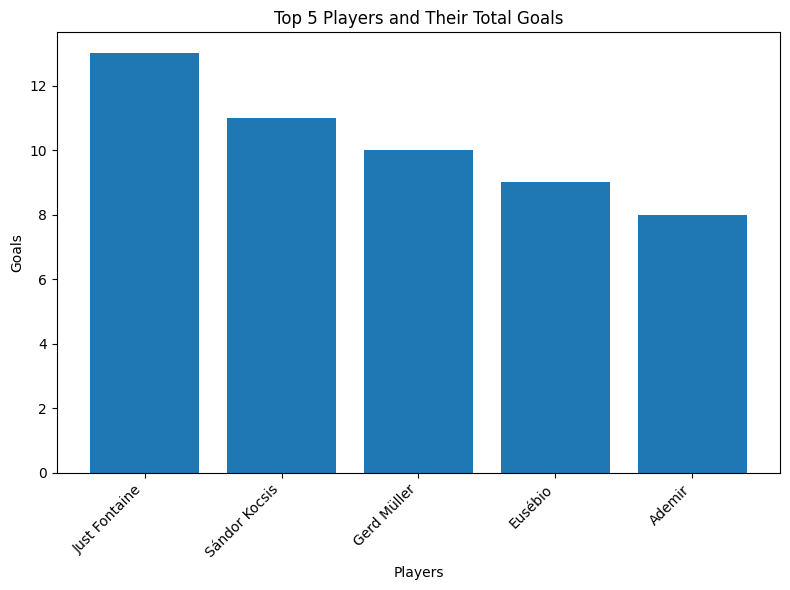

In [130]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

plt.bar(top_5_players['Player'], top_5_players['Goals'])

plt.xlabel("Players")
plt.ylabel("Goals")
plt.title("Top 5 Players and Their Total Goals")

plt.xticks(rotation=45, ha='right')

plt.tight_layout()

plt.show()